In [1]:
# Setup
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore', category=FutureWarning)

sns.set_theme(style="whitegrid")
df = pd.read_csv('diabetes_health_indicators.csv')

In [2]:
# Convert all floats to ints
for name, values in df.items():
    if name in df.columns:
        df[name] = pd.to_numeric(df[name], errors='coerce')
        df[name] = df[name].astype('Int64')

# Map numerical data to descriptive data
# Create copy for cleaning
df = df.rename(columns={'Diabetes_012': 'Diabetes_Status'})
df_clean = df.copy()

binary_map = {0: 'No', 1: 'Yes', 7: 'Not Sure', 9: 'No Response'}
sex_map = {0: 'Female', 1: 'Male'}

diabetes_map = {
    0: 'No Diabetes',
    1: 'Prediabetes',
    2: 'Diabetes'
}

gen_hlth_map = {
    1: 'Excellent',
    2: 'Very Good',
    3: 'Good',
    4: 'Fair',
    5: 'Poor',
    7: 'Not Sure',
    9: 'No Response'
}

education_map = {
    1: 'Never attended school',
    2: 'Grades 1-8',
    3: 'Grades 9-11',
    4: 'Grade 12/GED',
    5: 'College 1-3 years',
    6: 'College 4+ years',
    9: 'No Response',
}

income_map = {
    1: '< $10,000',
    2: '$10,000 - $14,999',
    3: '$15,000 - $19,999',
    4: '$20,000 - $24,999',
    5: '$25,000 - $34,999',
    6: '$35,000 - $49,999',
    7: '$50,000 - $74,999',
    8: '>= $75,000',
    77: 'Not Sure',
    99: 'No Response'
}

age_map = {
    1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44',
    6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69',
    11: '70-74', 12: '75-79', 13: '80+', 14: 'No Response'
}


df_clean['Diabetes_Status'] = df_clean['Diabetes_Status'].map(diabetes_map)

binary_cols = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk'
]

for col in binary_cols:
    if col in df.columns:
        df_clean[col] = df_clean[col].map(binary_map)


df_clean['Sex'] = df_clean['Sex'].map(sex_map)

scale_mappings = {
    'GenHlth': gen_hlth_map,
    'Education': education_map,
    'Income': income_map,
    'Age': age_map
}

for col, mapping in scale_mappings.items():
    if col in df.columns:
        df_clean[col] = df_clean[col].map(mapping)

# Diabetes Health Indicators Analysis

## Background

Diabetes is a chronic condition that affects millions worldwide. This project examines a set of health indicators to understand factors linked with diabetes presence and risk.

## Objectives

This analysis seeks to:

1. Identify the health indicators most strongly associated with diabetes status
2. Examine how demographic factors relate to diabetes risk
3. Explore links between modifiable behaviors and diabetes
4. Highlight potential intervention points for prevention and early management

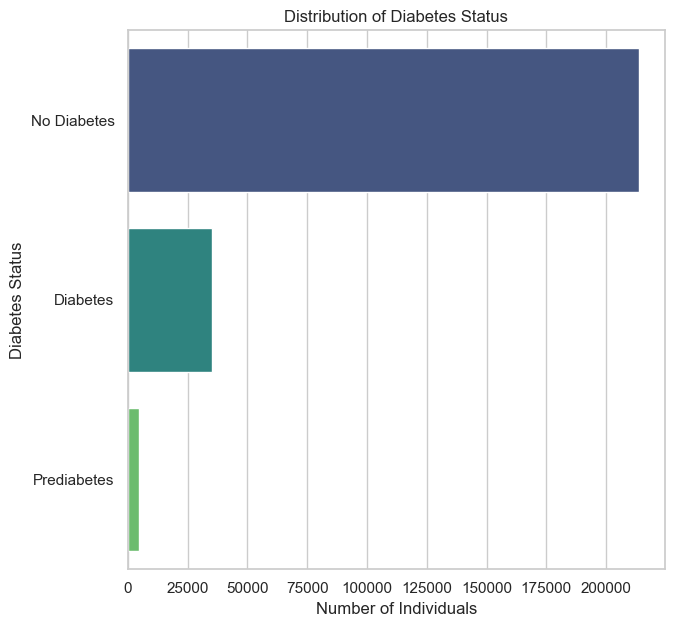

In [3]:
# Create a dashboard of visualizations
plt.figure(figsize=(18, 12))

# Diabetes Status Distribution
plt.subplot(2, 3, 1)
sns.countplot(y='Diabetes_Status', data=df_clean, palette='viridis')
plt.title('Distribution of Diabetes Status')
plt.xlabel('Number of Individuals')
plt.ylabel('Diabetes Status')
plt.tight_layout()

The dataset shows a clear imbalance in diabetes status. About 85% of individuals do not have diabetes, 13% have diabetes, and 2% have prediabetes. Although diabetes affects a smaller share of the population, the large sample size makes it a meaningful health burden. The contrast across groups provides a solid basis for comparing risk factors and demographic patterns linked with the condition.

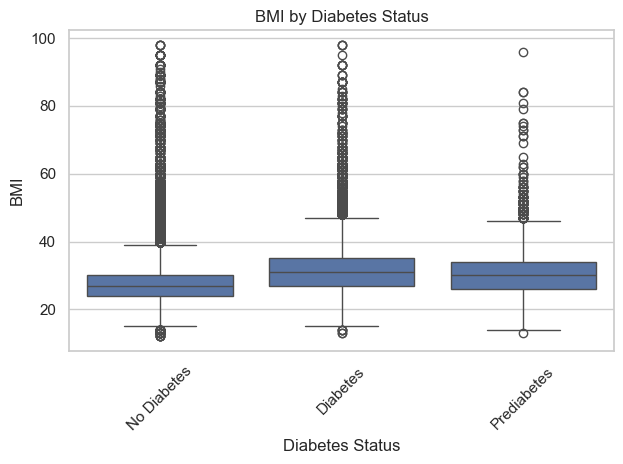

In [4]:
# BMI vs Diabetes Status
sns.boxplot(x='Diabetes_Status', y='BMI', data=df_clean)
plt.xlabel('Diabetes Status')
plt.title('BMI by Diabetes Status')
plt.xticks(rotation=45)
plt.tight_layout()

BMI distributions differ clearly by diabetes status. Individuals with diabetes and prediabetes have higher median BMI values (about 30 and 29) than those without diabetes (about 25). The density curve for people without diabetes peaks near a BMI of 25, while those with diabetes show a broader spread with more values in the overweight (25–29.9) and obese (30+) ranges. This supports BMI as an important risk factor, with higher values strongly linked to diabetes.

Age is a major factor in diabetes prevalence. Rates begin to rise after about age 45 and increase further in the 65–69, 70–74, 75–79, and 80+ groups. While fewer than 10% of adults under 45 have diabetes, the rate more than doubles in older groups. This pattern supports age-based screening and early risk counseling starting in midlife.

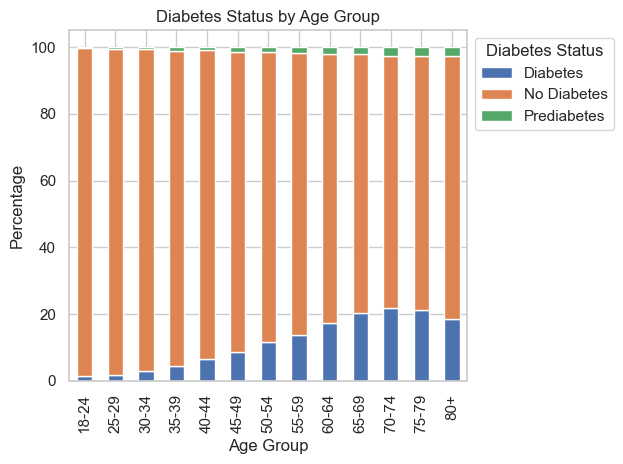

In [5]:
# Age Distribution by Diabetes
age_diabetes = pd.crosstab(df_clean['Age'], df_clean['Diabetes_Status'], normalize='index') * 100
age_diabetes.plot(kind='bar', stacked=True)
plt.title('Diabetes Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.legend(title='Diabetes Status', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

Age is a major factor in diabetes prevalence. Rates begin to rise after about age 45 and increase further in the 65–69, 70–74, 75–79, and 80+ groups. While fewer than 10% of adults under 45 have diabetes, the rate more than doubles in older groups. This pattern supports age-based screening and early risk counseling starting in midlife.

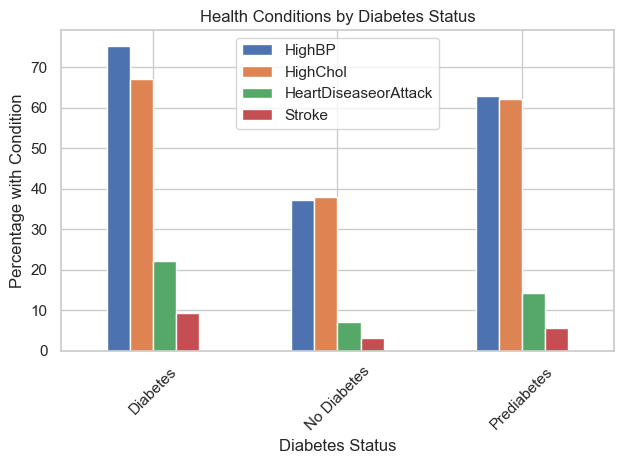

In [6]:
# Health Metrics Comparison
health_vars = ['HighBP', 'HighChol', 'HeartDiseaseorAttack', 'Stroke']
yes_percentages = {}

for var in health_vars:
    yes_percentages[var] = pd.crosstab(df_clean['Diabetes_Status'], df_clean[var])['Yes'] / \
                         df_clean['Diabetes_Status'].value_counts() * 100

pd.DataFrame(yes_percentages).plot(kind='bar')
plt.title('Health Conditions by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Percentage with Condition')
plt.xticks(rotation=45)
plt.tight_layout()

People with diabetes have higher rates of other health conditions. High blood pressure (73%), high cholesterol (67%), and heart disease (22%) are more common among those with diabetes compared with those without (38%, 35%, and 7%). People with prediabetes also show higher rates than those without diabetes, suggesting a progression of related conditions. These findings show how metabolic and cardiovascular risks often cluster, pointing to the need for coordinated management.

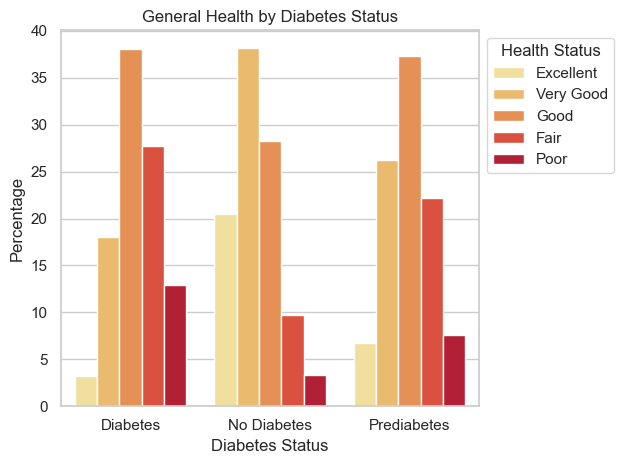

In [7]:
# General Health by Diabetes
health_order = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']
gen_health = pd.crosstab(df_clean['Diabetes_Status'], df_clean['GenHlth'])
gen_health_pct = gen_health.div(gen_health.sum(axis=1), axis=0) * 100

# Select only the ordered health categories and convert to DataFrame for plotting
gen_health_pct_ordered = gen_health_pct[health_order].reset_index()
gen_health_pct_ordered = pd.melt(gen_health_pct_ordered, id_vars=['Diabetes_Status'],
                                value_vars=health_order)

sns.barplot(x='Diabetes_Status', y='value', hue='GenHlth', data=gen_health_pct_ordered,
           hue_order=health_order, palette='YlOrRd')
plt.title('General Health by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Percentage')
plt.legend(title='Health Status', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

Self-reported general health differs across diabetes groups. Individuals without diabetes most often report very good health (38%). Those with diabetes more often report good (27%) or fair (28%) health, with only a small share reporting excellent health (3%). Prediabetes falls between the two, consistent with a transitional risk state. These patterns suggest diabetes affects daily well-being and perceived quality of health.

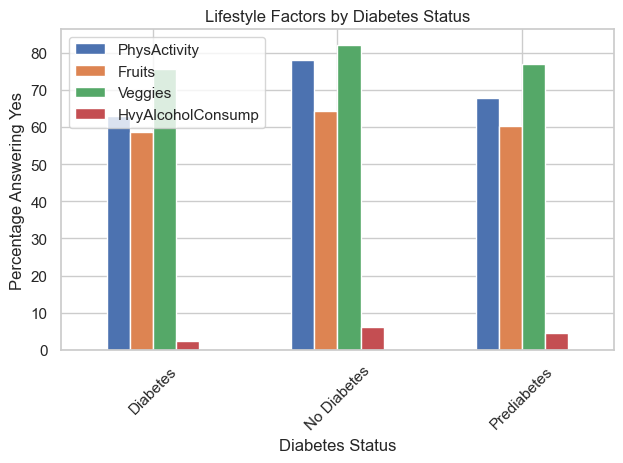

In [8]:
# Lifestyle Factors
lifestyle = ['PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump']
lifestyle_yes = {}

for var in lifestyle:
    lifestyle_yes[var] = pd.crosstab(df_clean['Diabetes_Status'], df_clean[var])['Yes'] / \
                        df_clean['Diabetes_Status'].value_counts() * 100

pd.DataFrame(lifestyle_yes).plot(kind='bar')
plt.title('Lifestyle Factors by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Percentage Answering Yes')
plt.xticks(rotation=45)
plt.tight_layout()

plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.tight_layout()
plt.show()

Lifestyle behaviors vary meaningfully by diabetes status. People without diabetes report higher rates of physical activity (78%), fruit intake (63%), and vegetable intake (81%) compared with those with diabetes (63%, 60%, and 75%). Heavy alcohol use is low overall but slightly higher among those without diabetes. These findings suggest lifestyle changes may help both prevention and management, with physical activity as a key target.

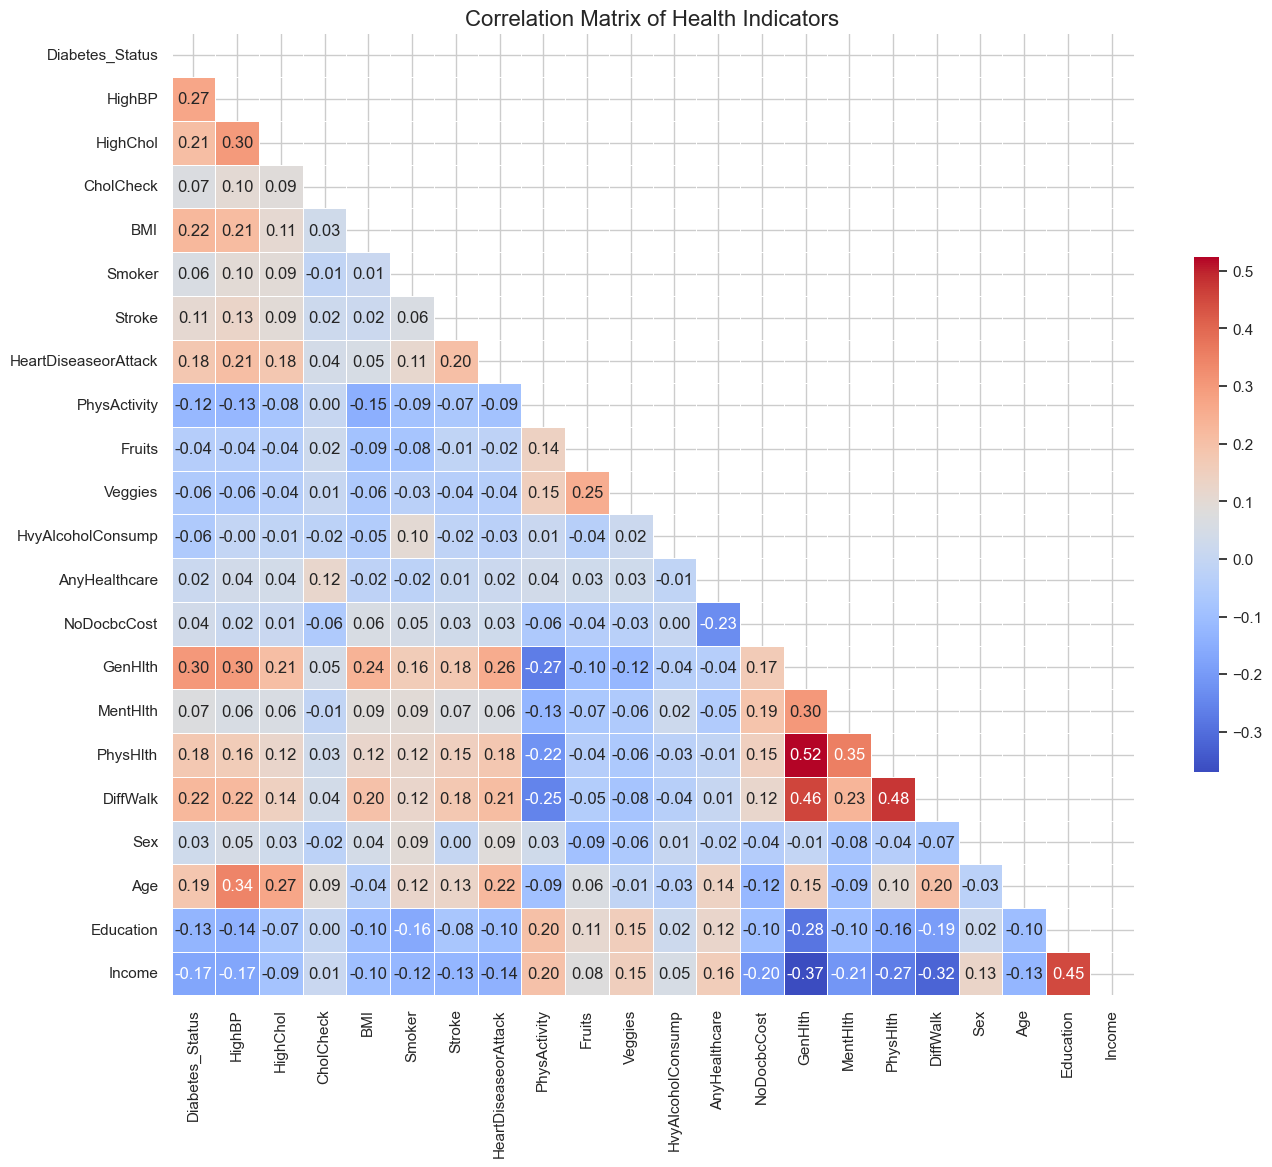

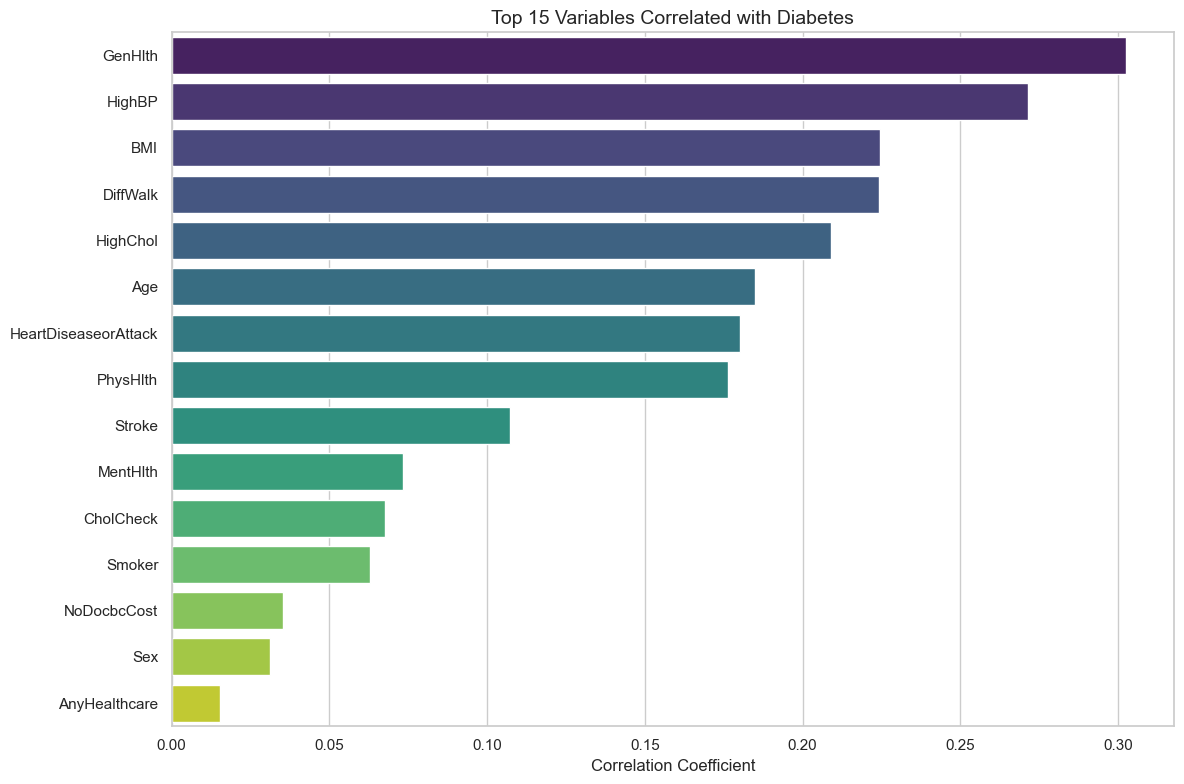

In [9]:
# Correlation analysis using original numeric data
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm",
           square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Health Indicators', fontsize=16)
plt.tight_layout()
plt.show()

# Extract and plot top correlations with Diabetes_Stats
diabetes_corr = corr['Diabetes_Status'].sort_values(ascending=False)
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=diabetes_corr.values[1:16], y=diabetes_corr.index[1:16], palette='viridis')
ax.set_ylabel('')  # hide y-axis label
plt.title('Top 15 Variables Correlated with Diabetes', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

The correlation matrix summarizes links across variables. Diabetes status shows its strongest positive correlations with general health rating (0.30), high blood pressure (0.27), BMI (0.22), and difficulty walking (0.22). Physical activity is negatively correlated (-0.12), suggesting a protective role. These results reinforce earlier findings and show that diabetes risk involves multiple interacting factors.

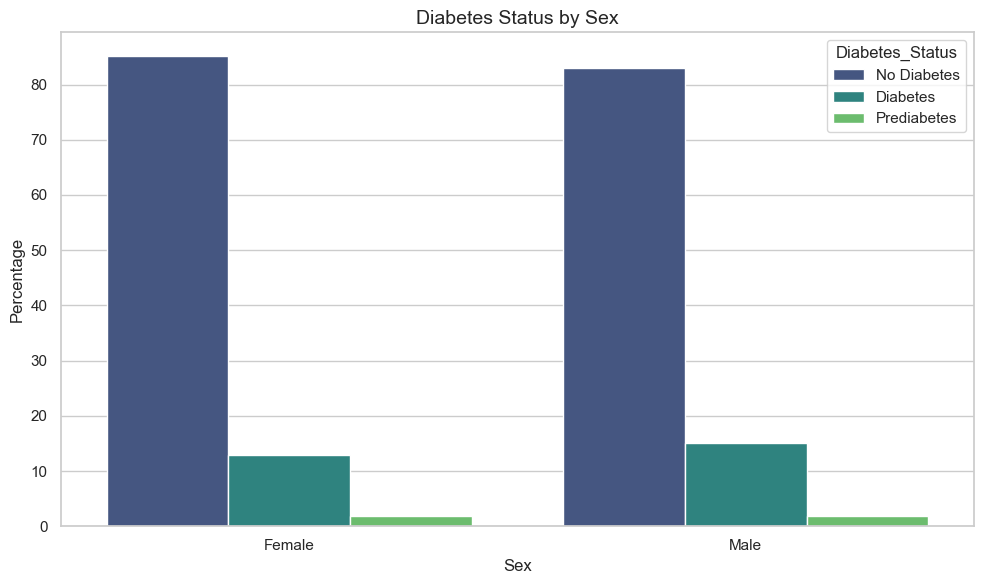

In [10]:
# Sex and Diabetes
plt.figure(figsize=(10, 6))
sex_data = []
for sex in df_clean['Sex'].unique():
    for status in df_clean['Diabetes_Status'].unique():
        subset = df_clean[(df_clean['Sex'] == sex)]
        pct = (subset['Diabetes_Status'] == status).mean() * 100
        sex_data.append({'Sex': sex, 'Diabetes_Status': status, 'Percentage': pct})

sex_df = pd.DataFrame(sex_data)
sns.barplot(x='Sex', y='Percentage', hue='Diabetes_Status', data=sex_df, palette='viridis')
plt.title('Diabetes Status by Sex', fontsize=14)
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()


Diabetes prevalence is similar between females and males. Both groups show comparable rates (roughly 13–15% diabetes and 1–2% prediabetes). This suggests sex alone is not a major independent driver of risk, although it may still interact with other factors. Prevention and management strategies should address both groups equally while focusing on shared modifiable risks.

In [11]:
# Education Factors
plt.figure(figsize=(12, 8))

ax = sns.barplot(x='Education', y='Percentage', hue='Diabetes_Status',
                 data=edu_df, palette='viridis', order=edu_order)

plt.title('Diabetes Status by Education', fontsize=14)
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
xticks = ax.get_xticklabels()

for i, lbl in enumerate(xticks):
    offset = -0.03 if (i % 2 == 0) else -0.08
    lbl.set_y(offset)

plt.subplots_adjust(bottom=0.30)
plt.legend(title='Diabetes Status', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

NameError: name 'edu_df' is not defined

<Figure size 1200x800 with 0 Axes>

Education level shows an inverse relationship with diabetes. People with more years of schooling, especially college graduates, have lower diabetes prevalence (about 10% among those with 4+ college years) compared with those who never attended school (about 27%).

In [ ]:
# Income and Diabetes
plt.figure(figsize=(12, 8))
income_order = [v for _, v in sorted(income_map.items()) if v not in ['Not Sure', 'No Response']]
income_data = []
for inc in income_order:
    if inc in df_clean['Income'].values:
        for status in df_clean['Diabetes_Status'].unique():
            subset = df_clean[(df_clean['Income'] == inc)]
            if len(subset) > 0:
                pct = (subset['Diabetes_Status'] == status).mean() * 100
                income_data.append({'Income': inc, 'Diabetes_Status': status, 'Percentage': pct})

income_df = pd.DataFrame(income_data)
ax = sns.barplot(x='Income', y='Percentage', hue='Diabetes_Status', data=income_df, palette='viridis', order=income_order)
plt.title('Diabetes Status by Income', fontsize=14)
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')

ax.tick_params(axis='x', which='major', pad=10)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='Diabetes Status', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.subplots_adjust(bottom=0.30)
plt.tight_layout()
plt.show()


Income shows a similar pattern: diabetes rates fall from about 25% in the lowest income bracket to about 8% in the highest. These trends highlight the influence of social and economic conditions and suggest that broader policies in education and economic stability may support diabetes prevention.

In [ ]:
# BMI Distribution by Diabetes Status
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df_clean, x='BMI', hue='Diabetes_Status', palette='viridis', fill=True)
plt.title('BMI Distribution by Diabetes Status', fontsize=14)
plt.xlabel('BMI')
plt.ylabel('Density')
plt.axvline(x=25, color='green', linestyle='--', label='Overweight Threshold')
plt.axvline(x=30, color='red', linestyle='--', label='Obesity Threshold')
plt.legend()
plt.tight_layout()
plt.show()

BMI distributions by diabetes status show distinct separation. People with diabetes have a broader and higher BMI range, with more values above overweight and obesity thresholds. This reinforces BMI as a central modifiable risk factor.

In [ ]:
# Risk Factor Analysis
plt.figure(figsize=(12, 8))
risk_df = df.copy()
risk_df['BMI_Risk'] = risk_df['BMI'].apply(lambda x: 0 if x < 25 else (1 if x < 30 else 2))
risk_df['Total_Risk'] = risk_df['HighBP'] + risk_df['HighChol'] + risk_df['BMI_Risk']
risk_df['Diabetes_Status'] = df_clean['Diabetes_Status']

sns.boxplot(x='Diabetes_Status', y='Total_Risk', data=risk_df, palette='viridis')
plt.title('Combined Risk Score by Diabetes Status', fontsize=16)
plt.xlabel('Diabetes Status')
plt.ylabel('Risk Score (Higher = More Risk Factors)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The combined risk score shows that individuals with diabetes tend to accumulate more concurrent risk factors. The wider spread indicates varied pathways to elevated risk. This supports multifaceted prevention strategies.

In [ ]:
# BMI and Physical Activity Relationship
plt.figure(figsize=(12, 8))
physical_act_data = pd.DataFrame({
    'BMI': df['BMI'],
    'PhysActivity': df_clean['PhysActivity'],
    'Diabetes_Status': df_clean['Diabetes_Status']
})

sns.violinplot(x='Diabetes_Status', y='BMI', hue='PhysActivity',
              data=physical_act_data, palette='viridis', split=True)
plt.title('BMI by Diabetes Status and Physical Activity', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xlabel('Diabetes Status')
plt.tight_layout()
plt.show()

BMI distributions differ by physical activity status within each diabetes group. Regular activity aligns with lower BMI density peaks, indicating its role as a supporting protective factor across all statuses.

In [ ]:
# Age, BMI, and Diabetes Status
plt.figure(figsize=(14, 8))
age_bmi_data = pd.DataFrame({
    'Age_Numeric': df['Age'],
    'BMI': df['BMI'],
    'Diabetes_Status': df_clean['Diabetes_Status']
})

sns.scatterplot(x='Age_Numeric', y='BMI', hue='Diabetes_Status',
               data=age_bmi_data, palette='viridis', alpha=0.5)
plt.title('Relationship Between Age, BMI, and Diabetes Status', fontsize=16)
plt.xlabel('Age Group (Numeric)')
plt.ylabel('BMI')
plt.axhline(y=25, color='green', linestyle='--', label='Overweight Threshold')
plt.axhline(y=30, color='red', linestyle='--', label='Obesity Threshold')
plt.legend(title='Diabetes Status')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Higher BMI values are more often linked with diabetes across age groups. Older individuals with elevated BMI appear especially vulnerable, suggesting priority for screening and targeted counseling.

# Conclusion

This exploratory analysis shows that diabetes relates to a set of interlinked factors spanning age, body weight, comorbid conditions, lifestyle behaviors, and social context. Clear differences in BMI patterns, age distribution, associated conditions, and socioeconomic gradients point to multiple opportunities for prevention and early intervention. The findings emphasize the value of promoting physical activity, healthy weight, and access to education and resources. These results can inform clinical risk assessment and public health strategies aimed at reducing the overall burden of diabetes.